Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv')

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
-

In [7]:
train.shape, test.shape

((30161, 14), (15060, 14))

In [8]:
train.isnull().sum(), test.isnull().sum()

(age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64,
 age              0
 workclass        0
 education        0
 educationno      0
 maritalstatus    0
 occupation       0
 relationship     0
 race             0
 sex              0
 capitalgain      0
 capitalloss      0
 hoursperweek     0
 native           0
 Salary           0
 dtype: int64)

In [9]:
train[train.duplicated()].shape, test[test.duplicated()].shape

((3258, 14), (930, 14))

In [10]:
train = train.drop_duplicates()
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [11]:
test = test.drop_duplicates()

In [12]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [13]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
# Extracting the Categorical variables
cat_var = [var for var in train.columns if train[var].dtype=='O']
print("There are {} categorical variables\n".format(len(cat_var)))
print("The categorical variables are as follows: \n\n", cat_var)

There are 9 categorical variables

The categorical variables are as follows: 

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [17]:
# Extracting the numerical variables
num_var = [var for var in test.columns if test[var].dtype !='O']
print("There are {} numerical varibales\n".format(len(num_var)))
print("The numerical variables are: \n\n",num_var)

There are 5 numerical varibales

The numerical variables are: 

 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [19]:
# Finding the freequency of words in train data set
for var in cat_var:
   print(train[var].value_counts()) 

 Private             19213
 Self-emp-not-inc     2431
 Local-gov            2014
 State-gov            1253
 Self-emp-inc         1049
 Federal-gov           929
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         8268
 Some-college    5893
 Bachelors       4503
 Masters         1558
 Assoc-voc       1256
 Assoc-acdm       994
 11th             941
 10th             770
 7th-8th          541
 Prof-school      532
 9th              449
 Doctorate        364
 12th             358
 5th-6th          283
 1st-4th          149
 Preschool         44
Name: education, dtype: int64
 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       3783
 Exec-managerial      3646
 Adm-clerical         3291
 Craft-repair         3229
 Sales                3205
 Other

In [21]:
# Finding the freequency of words in test data set
for var in cat_var:
    print(test[var].value_counts())

 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: workclass, dtype: int64
 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Prof-specialty       1899
 Exec-managerial      1897
 Craft-repair         1729
 Sales                1715
 Adm-clerical         1703
 Other-servic

In [22]:
for var in cat_var:
    print(var, 'has',len(train[var].unique()), 'labels')

workclass has 7 labels
education has 16 labels
maritalstatus has 7 labels
occupation has 14 labels
relationship has 6 labels
race has 5 labels
sex has 2 labels
native has 40 labels
Salary has 2 labels


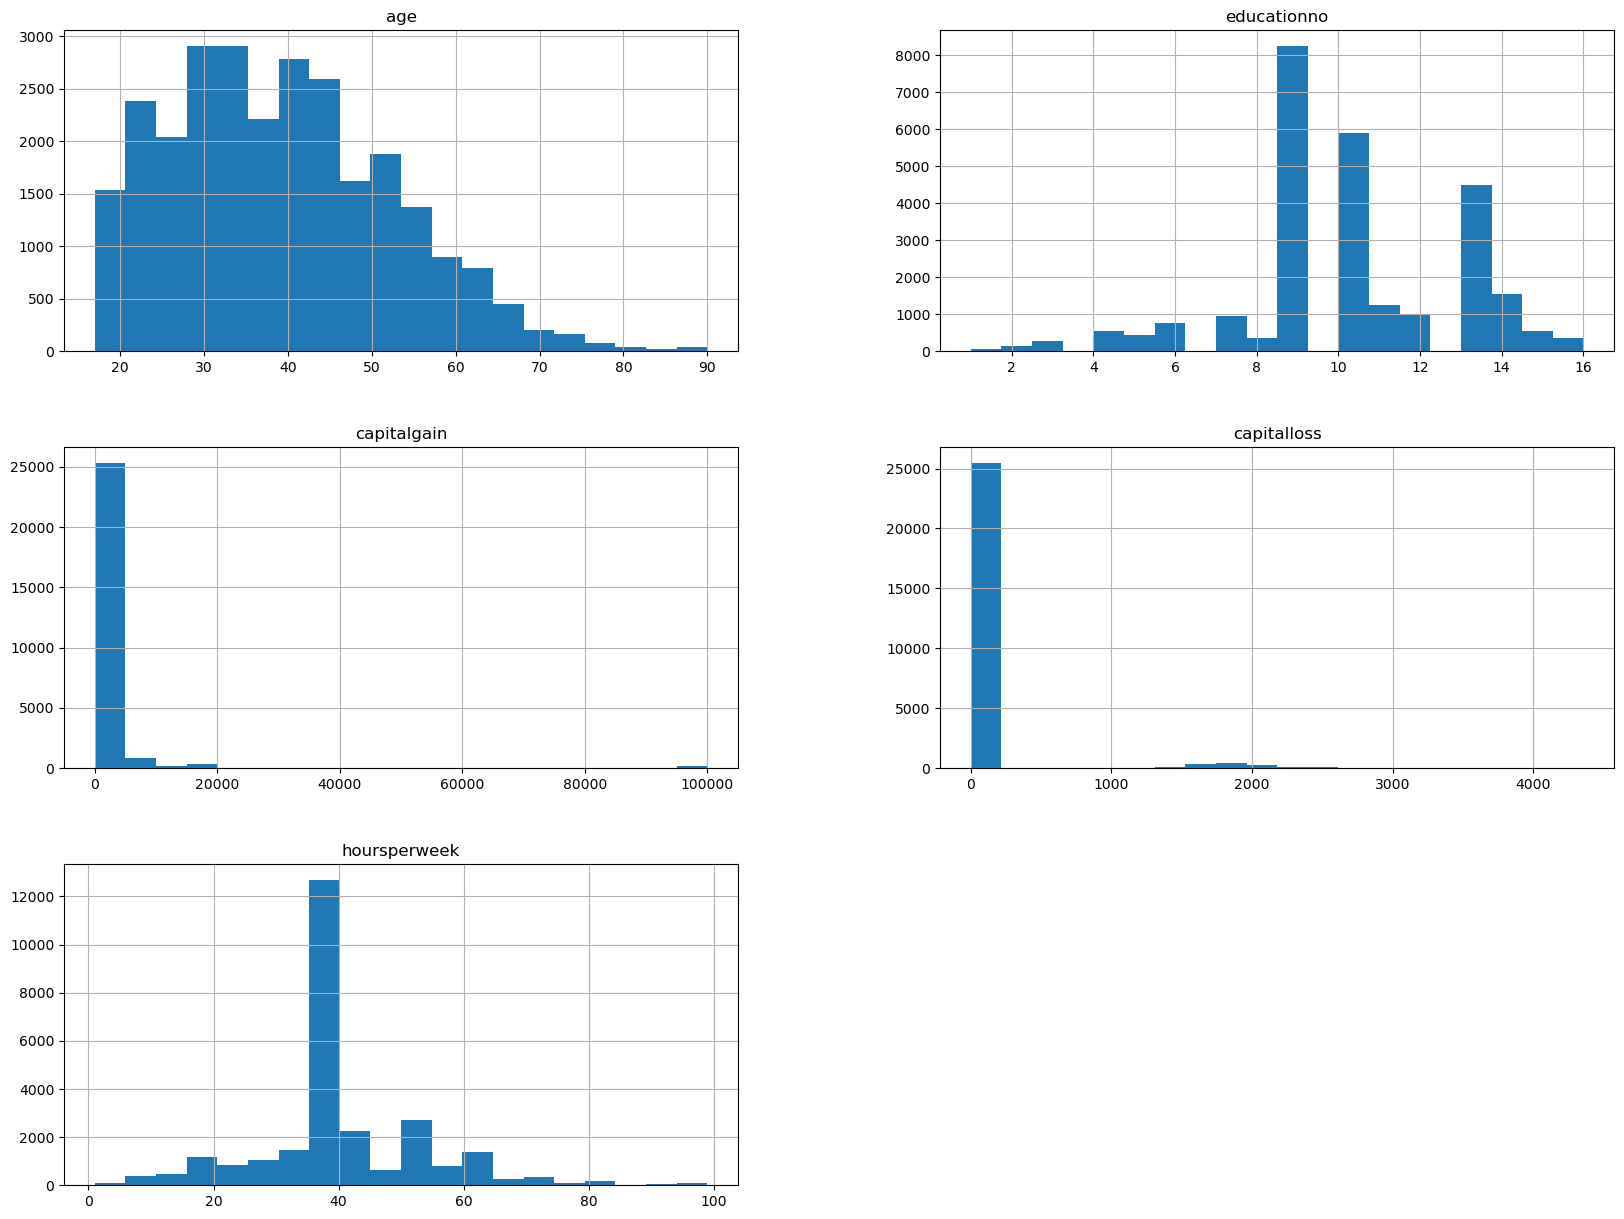

In [23]:
# Visualization of data
train.hist(bins=20, figsize=(20,15))
plt.show()

In [24]:
# category columns
cat_col = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native']
cat_col

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in cat_col:
    train[i] = label_encoder.fit_transform(train[i])
    test[i] = label_encoder.fit_transform(test[i])

In [28]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [29]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [31]:
x_train = train.iloc[:,:13].values
y_train = train['Salary'].values
x_test = test.iloc[:,:13].values
y_test = test['Salary'].values

In [32]:
x_train

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [27,  2,  7, ...,  0, 38, 37],
       [58,  2, 11, ...,  0, 40, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [33]:
x_test

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [34]:
# Normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [35]:
x_train = norm_func(x_train)
x_train

array([[3.900039e-04, 5.000050e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.000050e-04, 4.000040e-05, 9.000090e-05, ..., 0.000000e+00,
        1.300013e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [2.700027e-04, 2.000020e-05, 7.000070e-05, ..., 0.000000e+00,
        3.800038e-04, 3.700037e-04],
       [5.800058e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [5.200052e-04, 3.000030e-05, 1.100011e-04, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04]])

In [36]:
x_test = norm_func(x_test)
x_test

array([[2.500025e-04, 2.000020e-05, 1.000010e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.800038e-04, 2.000020e-05, 1.100011e-04, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [2.800028e-04, 1.000010e-05, 7.000070e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       ...,
       [3.800038e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        5.000050e-04, 3.700037e-04],
       [4.400044e-04, 2.000020e-05, 9.000090e-05, ..., 0.000000e+00,
        4.000040e-04, 3.700037e-04],
       [3.500035e-04, 3.000030e-05, 9.000090e-05, ..., 0.000000e+00,
        6.000060e-04, 3.700037e-04]])

### Apply Naive Bayes for classification

In [46]:
from sklearn.naive_bayes import MultinomialNB as MB
MB_model = MB()
train_pred_mb = MB_model.fit(x_train, y_train).predict(x_train)
test_pred_mb = MB_model.fit(x_test, y_test).predict(x_test)

In [47]:
train_acc_mb = np.mean(train_pred_mb==y_train)
print("Train Accuracy = ",train_acc_mb*100)

Train Accuracy =  74.42664386871353


In [48]:
test_acc_mb = np.mean(test_pred_mb==y_test)
print("Test Accuracy = ",test_acc_mb*100)

Test Accuracy =  75.15923566878982


Both the test and train accuracy are approximately equal and hence the multi-model in neither overfit nor underfit

In [49]:
# Making Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, test_pred_multi)

In [50]:
confusion_matrix

array([[10620,     0],
       [ 3510,     0]], dtype=int64)

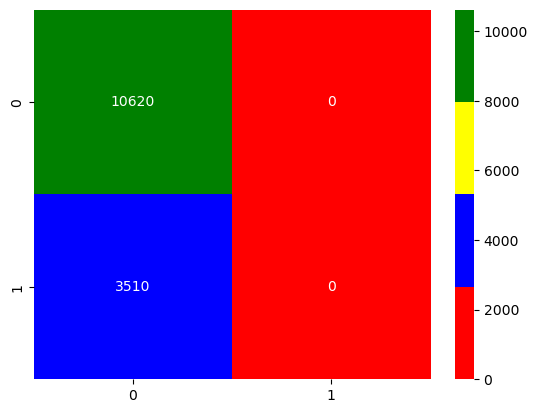

In [51]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=['red','blue','yellow','green'])
plt.show()

### Apply GaussianNB

In [52]:
from sklearn.naive_bayes import GaussianNB as GB
GB_model = GB()
train_pred_gb = GB_model.fit(x_train, y_train).predict(x_train)
test_pred_gb = GB_model.fit(x_test, y_test).predict(x_test)

In [53]:
train_acc_gb = np.mean(train_pred_gb==y_train)
print("Accuarcy score = %.2f%%"%(train_acc_gb*100))

Accuarcy score = 79.34%


In [55]:
test_acc_g = np.mean(test_pred_gb==y_test)
print("Accuracy score = %.2f%%"%(test_acc_g*100))

Accuracy score = 79.41%


Both the test and train accuracy are approximately equal and hence the Gaussian NB-model in neither overfit nor underfit

In [57]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(test_pred_gb,y_test) 
confusion_matrix1

array([[10057,  2347],
       [  563,  1163]], dtype=int64)

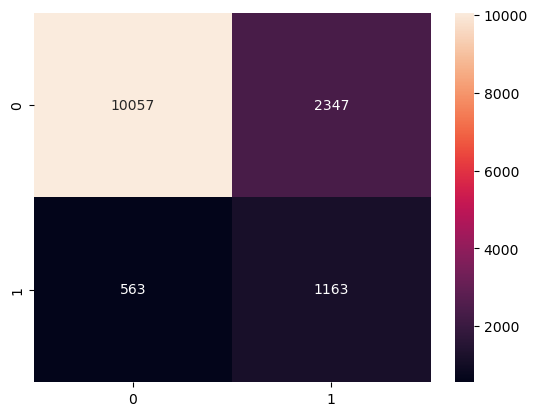

In [59]:
# ploting by heatmap
sns.heatmap(confusion_matrix1, annot=True, fmt='d');